## Explication du problème

Les "gilets jaunes" est le nom donné au mouvement d’origine citoyenne de contestation contre la hausse des taxes. Nous nous intéressons dans ce travail à l’influence croisée de la science des données et des sciences. Sociales du politique. Le mouvement s'élargit de plus en plus avec des dommages encore plus important.

## Présentation de la solution proposée
Ce mouvement est apparu principalement sur les réseaux sociaux, il est donc très important de voir les avis des internautes a ce sujet. Dans notre cas, nous allons étudier l'opinion des internautes sur Tweeter.

### les librairies python utilisés

In [1]:
import os
import tweepy as tw
import pandas as pd
from googletrans import Translator
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

### Access key Twitter

In [2]:
consumer_key = 'dzGNau17lTYcL355HUF7KQZvn'
consumer_secret = 'S7UTCGHVWrYgw8JFok9MFgS0qlL9tXEQHSKzi4GoOvXBIqv3ci'
access_token_key = '1315409440657551366-6KdwPAKpt3utvMQXkqCQzQBg7J26ht'
access_token_secret = '73XYbZUP8571UZIfXia33YzhnPQSGuWaF1xGQOSA6u1AV'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_word = "#GiletJaune"
date_since = '2018-01-01'

In [5]:
#search tweets with hashtag 'GiletJaune'
Gilet_Jaune = tw.Cursor(api.search, q = search_word, lang = 'fr', since = date_since).items(2000)

In [6]:
#display tweets 
Tweets_Gilet_Jaune = [[tweet.text]for tweet in Gilet_Jaune]
Tweets_Gilet_Jaune

[["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #giletjaune \n\nSans les images ou…"],
 ["RT @Laury_anne: J'ai suivi le procès d'un policier lanceur de pavés sur la foule lors d'une manifestation #gi

In [7]:
#convert tweets to dataframe
df = pd.DataFrame([tweet for tweet in Tweets_Gilet_Jaune], columns=['tweets'])
df.head()

,tweets
0,RT @Laury_anne: J'ai suivi le procès d'un poli...
1,RT @Laury_anne: J'ai suivi le procès d'un poli...
2,RT @Laury_anne: J'ai suivi le procès d'un poli...
3,RT @Laury_anne: J'ai suivi le procès d'un poli...
4,RT @Laury_anne: J'ai suivi le procès d'un poli...


In [10]:
#translate the tweets in english 
translator = Translator()
df['Tweets'] = df['tweets'].apply(translator.translate, src='fr', dest='en').apply(getattr, args=('text',))
df

,tweets,Tweets
0,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
1,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
2,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
3,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
4,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
...,...,...
804,RT @davidchami75100: Après presque 2 ans de lu...,RT @ davidchami75100: After almost 2 years of ...
805,RT @davidchami75100: Après presque 2 ans de lu...,RT @ davidchami75100: After almost 2 years of ...
806,RT @davidchami75100: Après presque 2 ans de lu...,RT @ davidchami75100: After almost 2 years of ...
807,RT @davidchami75100: Après presque 2 ans de lu...,RT @ davidchami75100: After almost 2 years of ...


In [11]:
#drop duplicates 
df.drop_duplicates(subset=['tweets', 'Tweets'], keep='first', inplace=True)
df

,tweets,Tweets
0,RT @Laury_anne: J'ai suivi le procès d'un poli...,RT @Laury_anne: I followed the trial of a poli...
70,@JaclineMouraud votre action en tant que leade...,@JaclineMouraud your action as a leader #gilet...
75,"RT @mormach: Cet été, pendant les vacances à #...","RT @mormach: This summer, during the holidays ..."
77,@DhomeNadine @olydiver Ils n'ont pas leur #Gil...,@DhomeNadine @olydiver They don't have their #...
79,RT @fxverdot: T’es pas un peu gonflée Jacline ...,RT @fxverdot: Aren't you a little bloated Jacl...
...,...,...
788,#COVID19 #LREM #CouvreFeu \n\nLe Président #Ma...,# COVID19 #LREM #CouvreFire\n\nThe President #...
790,@LaurentThines @raoult_didier @Rev_de_Presse J...,@LaurentThines @raoult_didier @Rev_de_Presse I...
800,RT @Carbalas1: Je suis assez fier de moi.\nMa ...,RT @ Carbalas1: I'm pretty proud of myself.\nM...
801,Je suis assez fier de moi.\nMa mère est tendan...,I am quite proud of myself.\nMy mother is tren...


In [12]:
df = df.drop('tweets', axis=1)
df

,Tweets
0,RT @Laury_anne: I followed the trial of a poli...
70,@JaclineMouraud your action as a leader #gilet...
75,"RT @mormach: This summer, during the holidays ..."
77,@DhomeNadine @olydiver They don't have their #...
79,RT @fxverdot: Aren't you a little bloated Jacl...
...,...
788,# COVID19 #LREM #CouvreFire\n\nThe President #...
790,@LaurentThines @raoult_didier @Rev_de_Presse I...
800,RT @ Carbalas1: I'm pretty proud of myself.\nM...
801,I am quite proud of myself.\nMy mother is tren...


In [13]:
#import our dataset 
df1 = pd.read_csv("giletjaune.csv", encoding='latin-1')
df1.head()

,Date-Time,Twitter handle,Pleasure,Arousal,Tweet,sentiment
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ...",NaN,NaN,NaN,NaN,NaN
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @...",NaN,NaN,NaN,NaN,NaN
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof...",NaN,NaN,NaN,NaN,NaN
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn...",NaN,NaN,NaN,NaN,NaN
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ...",NaN,NaN,NaN,NaN,NaN


In [14]:
#drop Nan
df1 = df1.drop(['Twitter handle', 'Pleasure', 'Arousal', 'Tweet', 'sentiment'], axis=1)
df1.head()

,Date-Time
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ..."
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @..."
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof..."
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn..."
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ..."


In [15]:
#rename columns 
df1.rename(columns={"Date-Time":"Tweets"}, inplace=True)
df1

,Tweets
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ..."
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @..."
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof..."
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn..."
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ..."
5,"12-03-18 07:53,andrew_ed_ba,5.83,3.86,""As part..."
6,"12-04-18 11:07,Viva la @EmmanuelMacron indeed...."
7,"12-04-18 02:54,Antibullshit12,5.07,4.54,""RT @A..."
8,"12-04-18 02:54,Antibullshit12,5.07,4.54,""RT @A..."
9,"12-02-18 17:31,AxelHuynh,4.69,4.45,""TODAY, A S..."


In [16]:
#concat our dataset with recently tweets 
DataFrame = pd.concat([df1, df], axis=0)
DataFrame.head()

,Tweets
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ..."
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @..."
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof..."
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn..."
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ..."


In [17]:
#copy of dattframe
df = DataFrame.copy()

In [18]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_ :]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\+S', '', text)
    text = re.sub(r'https', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = text.lower()
    return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"-- ,thcrusader,.,.,""by the time petit macron g..."
1,"-- ,ahmedtarekmokh,.,.,""arcdetriomphe today tu..."
2,"-- ,alfarthur,.,.,. doubt paris will be seeing..."
3,"-- ,alicnsuna,.,.,giletjaune protestors beatin..."
4,"-- ,alown,.,.,"". police left their mask, and g..."
...,...
788,covid lrem couvrefire\n\nthe president macron...
790,"giletjaune, scientist, and avid reader of peer..."
800,'m pretty proud of myself.\nmy mother is trend...
801,i am quite proud of myself.\nmy mother is tren...


In [19]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPloarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPloarity)

#show DataFrame
df

,Tweets,Subjectivity,Polarity
0,"-- ,thcrusader,.,.,""by the time petit macron g...",0.000000,0.000000
1,"-- ,ahmedtarekmokh,.,.,""arcdetriomphe today tu...",0.599091,0.310455
2,"-- ,alfarthur,.,.,. doubt paris will be seeing...",0.477273,0.318182
3,"-- ,alicnsuna,.,.,giletjaune protestors beatin...",0.000000,0.000000
4,"-- ,alown,.,.,"". police left their mask, and g...",0.133333,-0.100000
...,...,...,...
788,covid lrem couvrefire\n\nthe president macron...,0.200000,0.300000
790,"giletjaune, scientist, and avid reader of peer...",1.000000,0.250000
800,'m pretty proud of myself.\nmy mother is trend...,0.750000,0.362500
801,i am quite proud of myself.\nmy mother is tren...,0.666667,0.400000


In [20]:
#Create a function to compute the negative, neutral and postive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the DataFrame
df

,Tweets,Subjectivity,Polarity,Analysis
0,"-- ,thcrusader,.,.,""by the time petit macron g...",0.000000,0.000000,Neutral
1,"-- ,ahmedtarekmokh,.,.,""arcdetriomphe today tu...",0.599091,0.310455,Positive
2,"-- ,alfarthur,.,.,. doubt paris will be seeing...",0.477273,0.318182,Positive
3,"-- ,alicnsuna,.,.,giletjaune protestors beatin...",0.000000,0.000000,Neutral
4,"-- ,alown,.,.,"". police left their mask, and g...",0.133333,-0.100000,Negative
...,...,...,...,...
788,covid lrem couvrefire\n\nthe president macron...,0.200000,0.300000,Positive
790,"giletjaune, scientist, and avid reader of peer...",1.000000,0.250000,Positive
800,'m pretty proud of myself.\nmy mother is trend...,0.750000,0.362500,Positive
801,i am quite proud of myself.\nmy mother is tren...,0.666667,0.400000,Positive


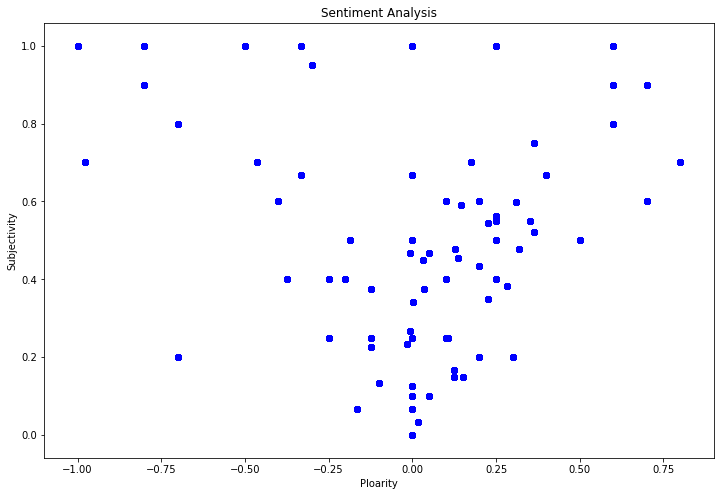

In [21]:
#plot the Polarity and the Subjectivity 
plt.figure(figsize=(12,8))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Ploarity")
plt.ylabel("Subjectivity")
plt.show()

In [22]:
#get the percentage of positive tweets
PositiveTweets = df[df.Analysis == 'Positive']
PositiveTweets = PositiveTweets['Tweets']

PositiveTweets

1      -- ,ahmedtarekmokh,.,.,"arcdetriomphe today tu...
2      -- ,alfarthur,.,.,. doubt paris will be seeing...
5      -- ,andrew_ed_ba,.,.,"as part francophone, way...
6                               -- ,viva la .",positive;
14     -- ,cdeysson,.,.,"the point of theâ gilet jaun...
15     -- ,charmgritty,.,.,"imagine a world, dear rea...
16     -- ,clinicalwstmn,.,.,"/shifting class interes...
17     -- ,delightoxygen,.,.,"also the antifas on thi...
18     -- ,dickydido,.,.,"'mon, sjw, do you really th...
20     -- ,dominic_putney,.,.,.  vive le giletjaune g...
21     -- ,donnypongo,.,.,"paris said they felt the p...
22     -- ,âi came peacefully, but even iâm ready...
23     -- ,duyquykaka,.,.,i liked a //t.co/klkrpkqjfm...
25     -- ,edith_fr,.,.,". macron arrives in argentin...
27     -- ,feliks,.,.,"metro this morning france macr...
28     -- ,fiatpaliohlx,.,.,"twitter, although i supp...
30     -- ,ghrissiha,.,.,"is it a spontaneous popular...
31      -- ,is france a prelude

In [23]:
#get the percentage of positive tweets
PositiveTweets = df[df.Analysis == 'Positive']
PositiveTweets = PositiveTweets['Tweets']

round((PositiveTweets.shape[0]/df.shape[0])* 100, 1)

25.9

In [24]:
#get the percentage of positive tweets
NegativeTweets = df[df.Analysis == 'Negative']
NegativeTweets = NegativeTweets['Tweets']

round((NegativeTweets.shape[0]/df.shape[0])* 100, 1)

14.2

In [25]:
#get the percentage of positive tweets
NeutralTweets = df[df.Analysis == 'Neutral']
NeutralTweets = NeutralTweets['Tweets']

round((NeutralTweets.shape[0]/df.shape[0])* 100, 1)

59.9

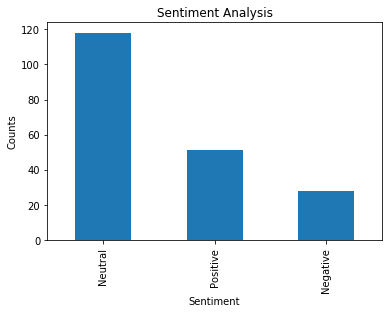

In [26]:
#show the value counts
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [27]:
dfPostitive = df[df.Analysis == 'Positive']
dfNegative = df[df.Analysis == 'Negative']

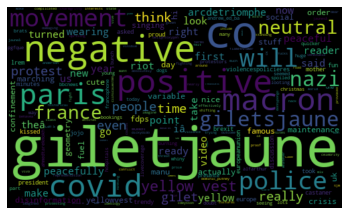

In [29]:
#plot the wordcloud Positive 
allWords = ' '.join([tweet for tweet in dfPostitive['Tweets']])
wordCLoud = WordCloud(width=500, height=300, random_state=20, max_font_size=120).generate(allWords)

plt.imshow(wordCLoud, interpolation='bilinear')
plt.axis('off')
plt.show()

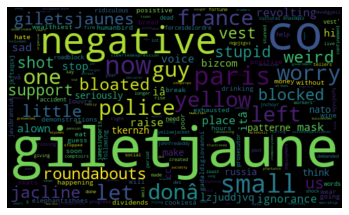

In [30]:
#plot the wordcloud Negative
allWords = ' '.join([tweet for tweet in dfNegative['Tweets']])
wordCLoud = WordCloud(width=500, height=300, random_state=20, max_font_size=120).generate(allWords)

plt.imshow(wordCLoud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#replace columns Analysis with values -1:Negative, 0:Neutral, 1:Positive
df['Analysis'].replace(['Negative', 'Neutral', 'Positive'], [-1, 0, 1], inplace=True)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"-- ,thcrusader,.,.,""by the time petit macron g...",0.000000,0.000000,0
1,"-- ,ahmedtarekmokh,.,.,""arcdetriomphe today tu...",0.599091,0.310455,1
2,"-- ,alfarthur,.,.,. doubt paris will be seeing...",0.477273,0.318182,1
3,"-- ,alicnsuna,.,.,giletjaune protestors beatin...",0.000000,0.000000,0
4,"-- ,alown,.,.,"". police left their mask, and g...",0.133333,-0.100000,-1


In [32]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Tweets).toarray()

In [33]:
cible = df['Analysis']
X_train, X_test, y_train, y_test = train_test_split(X, cible, test_size =0.2, random_state = 0)

In [34]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(accuracy_score(y_test, ypred))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [49]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif, k=10))

In [50]:
NaiveBayse = make_pipeline(preprocessor, GaussianNB())
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
Svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
Knn = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [51]:
list_of_models = {'NaiveBayse':NaiveBayse,
                  'RandomForest':RandomForest, 
                  'AdaBoost':AdaBoost, 
                  'DecisionTree':DecisionTree, 
                  'Svm':Svm, 
                  'Knn':Knn}

In [52]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

NaiveBayse


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.65
[[ 0  3  0]
 [ 0 26  0]
 [ 0 11  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.65      1.00      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.65        40
   macro avg       0.22      0.33      0.26        40
weighted avg       0.42      0.65      0.51        40

RandomForest


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.625
[[ 0  3  0]
 [ 1 25  0]
 [ 2  9  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.68      0.96      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.62        40
   macro avg       0.23      0.32      0.26        40
weighted avg       0.44      0.62      0.52        40

AdaBoost


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.625
[[ 0  3  0]
 [ 1 25  0]
 [ 2  9  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.68      0.96      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.62        40
   macro avg       0.23      0.32      0.26        40
weighted avg       0.44      0.62      0.52        40

DecisionTree


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.625
[[ 0  3  0]
 [ 1 25  0]
 [ 2  9  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.68      0.96      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.62        40
   macro avg       0.23      0.32      0.26        40
weighted avg       0.44      0.62      0.52        40

Svm


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.625
[[ 0  3  0]
 [ 1 25  0]
 [ 2  9  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.68      0.96      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.62        40
   macro avg       0.23      0.32      0.26        40
weighted avg       0.44      0.62      0.52        40

Knn


C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [     0      7     11 ... 731439 731440 731442] are constant.
  UserWarning)
C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.625
[[ 0  3  0]
 [ 1 25  0]
 [ 2  9  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.68      0.96      0.79        26
           1       0.00      0.00      0.00        11

    accuracy                           0.62        40
   macro avg       0.23      0.32      0.26        40
weighted avg       0.44      0.62      0.52        40



C:\Users\asus\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


on trouve que l'algorithme Naive bayes donne une accuracy le plus élevé 